In [43]:
import pickle, os
import numpy as np
from numpy.linalg import matrix_power

root_path = '/Users/jiahang/Documents/dagma/src/dagma/'
n_nodes = 60

import sys
sys.path.append('/Users/jiahang/Documents/dagma/src/dagma/')

import deconv
from importlib import reload
reload(deconv)

import matplotlib.pyplot as plt
import utils_dagma

In [12]:
with open(os.path.join(root_path, 'simulated_data/v11/v60/W/W_2_0.pkl'), 'rb') as f:
    W_2_0 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v60/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
    
W = W_2_0['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_2_0['W_est']
W_dir, model = deconv.net_deconv(W_est, {})

Epoch 0 | Loss 0.033896
Epoch 200 | Loss 0.000581
Epoch 400 | Loss 0.000286
Epoch 600 | Loss 0.000295
Epoch 800 | Loss 0.000156
Epoch 1000 | Loss 0.000135
Epoch 1200 | Loss 0.000108
Epoch 1400 | Loss 0.000104
Epoch 1600 | Loss 0.000100
Epoch 1800 | Loss 0.000096
Epoch 2000 | Loss 0.000093
Epoch 2200 | Loss 0.000089
Epoch 2400 | Loss 0.000085
Epoch 2600 | Loss 0.000082
Epoch 2800 | Loss 0.000078
Epoch 3000 | Loss 0.000075
Epoch 3200 | Loss 0.000072
Epoch 3400 | Loss 0.000068
Epoch 3600 | Loss 0.000065
Epoch 3800 | Loss 0.000065
Epoch 4000 | Loss 0.000062
Epoch 4200 | Loss 0.000061
Epoch 4400 | Loss 0.000072
Epoch 4600 | Loss 0.000057
Epoch 4800 | Loss 0.000053
Epoch 5000 | Loss 0.000052
Epoch 5200 | Loss 0.000050
Epoch 5400 | Loss 0.000049
Epoch 5600 | Loss 0.000048
Epoch 5800 | Loss 0.000048
Epoch 6000 | Loss 0.000046
Epoch 6200 | Loss 0.000049
Epoch 6400 | Loss 0.000042
Epoch 6600 | Loss 0.000042
Epoch 6800 | Loss 0.000041
Epoch 7000 | Loss 0.000051
Epoch 7200 | Loss 0.000047
Epoch 74

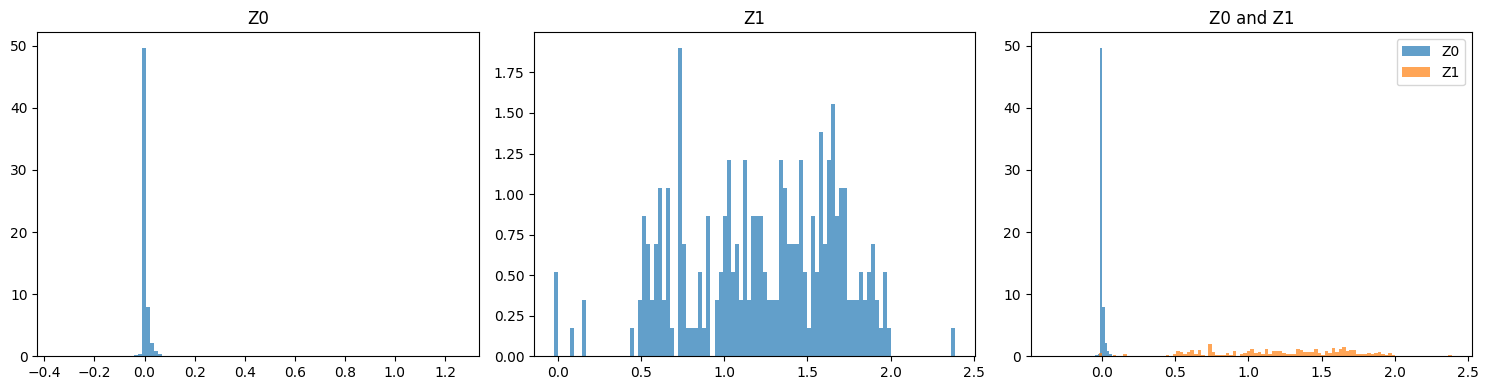

In [26]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

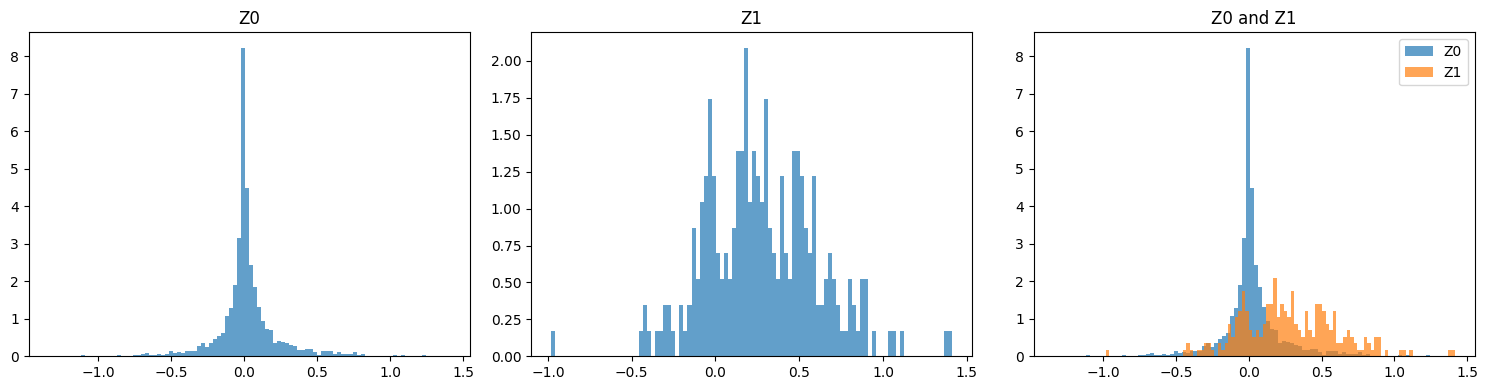

In [27]:
Z = np.abs(W_dir[:n_nodes, :n_nodes]) - np.abs(W_dir[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [28]:
Z0.min()

-1.3387691

In [29]:
Z0.max()

1.4064714

In [34]:
W_dir.shape

(120, 120)

In [38]:
W_dir_ori = W_dir[:20, :20]
mask = (np.abs(W_dir_ori) >= 0.3)

In [51]:
(np.abs(W_dir) > 1e-4).sum()

14373

In [50]:
(np.abs(W_est) > 1e-4).sum()

3051

In [41]:
B_dir_ori = np.zeros_like(W_dir_ori)
B_dir_ori[mask], B_dir_ori[~mask] = 1, 0

In [42]:
B_dir_ori

array([[1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.

In [44]:
utils_dagma.count_accuracy(B_true, B_dir_ori)

{'fdr': 0.9285714285714286,
 'tpr': 0.016666666666666666,
 'fpr': 0.03398692810457516,
 'shd': 301,
 'nnz': 56}

In [52]:
W_est

array([[ 0.00000000e+00, -1.62125406e-04, -6.25173672e-05, ...,
        -1.67607732e-05, -9.05418578e-06,  5.80096037e-06],
       [-7.41657509e-05,  0.00000000e+00, -5.13470044e-03, ...,
         1.92798200e-05, -1.18929818e-05, -9.68079792e-06],
       [-2.67115947e-05,  4.71654546e-03,  0.00000000e+00, ...,
        -1.29307435e-05,  7.47957901e-05, -1.77410754e-05],
       ...,
       [-1.16044704e-06,  9.70652418e-06, -2.35714104e-06, ...,
         0.00000000e+00,  7.31910982e-06, -1.37472315e-05],
       [-1.83800255e-05, -1.58262846e-05, -1.67574019e-06, ...,
        -3.62855385e-04,  0.00000000e+00, -3.19152707e-05],
       [ 1.88435808e-01,  1.38613298e-05,  6.16274032e-06, ...,
         1.82924691e-05, -4.91069405e-06,  0.00000000e+00]])